In [1]:
#local_path = 'C:\Users\Karlc\Desktop\VOGAS';
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from jsonLab_readVolgacore import jsonLab_readVolgacore
from plot_sensor import plot_sensor
import random


local_path = 'C:/Users/dario/OneDrive/Proyectos_SIRILAND/MatlabToPython_Cuastumal/VOGAS'
db_path = 'test_db/test_01LV'

clin_table = pd.read_csv(f"{local_path}/{db_path}/test_clinic_1.csv", sep = ';', header = 0)
link_table = pd.read_csv(f"{local_path}/{db_path}/test_link_table.csv", sep = ';', header = 0)

#link_table

In [2]:

curid = '01LV0078'
link_row = link_table[link_table.VQ_patientID == curid].VQ_patientID.index.values
#link_table.iloc[link_row]

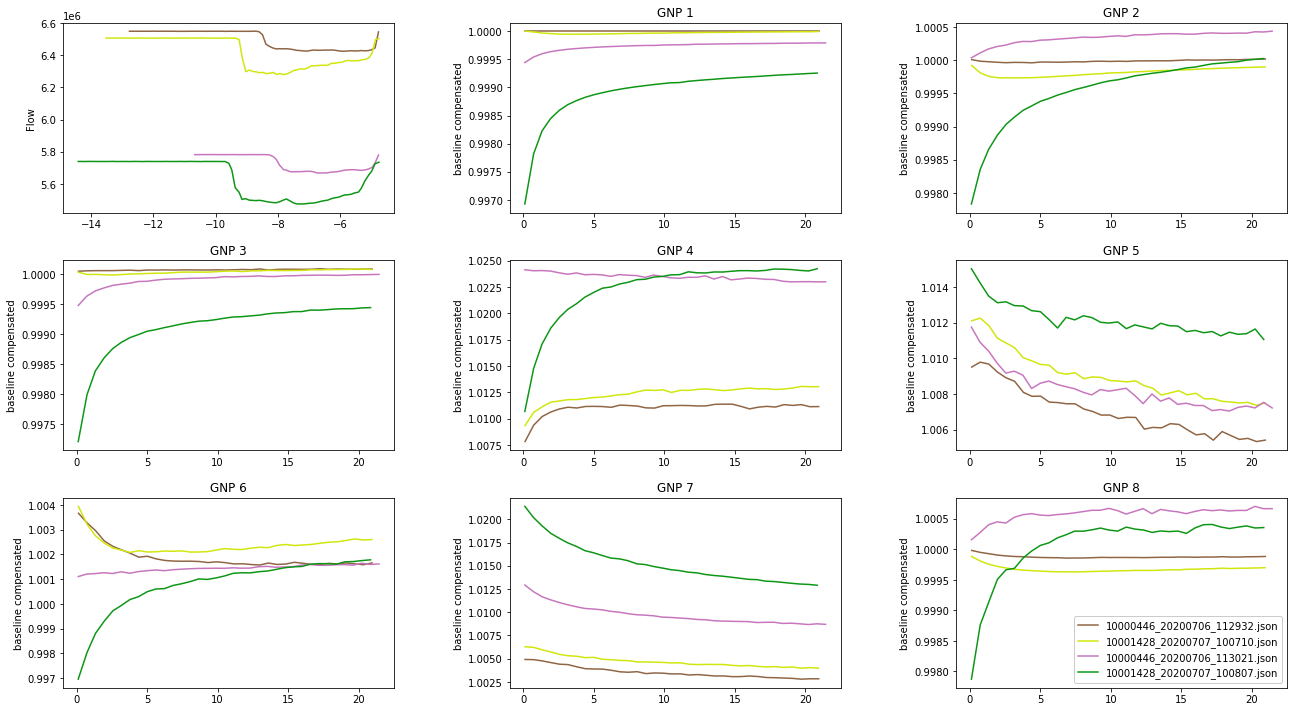

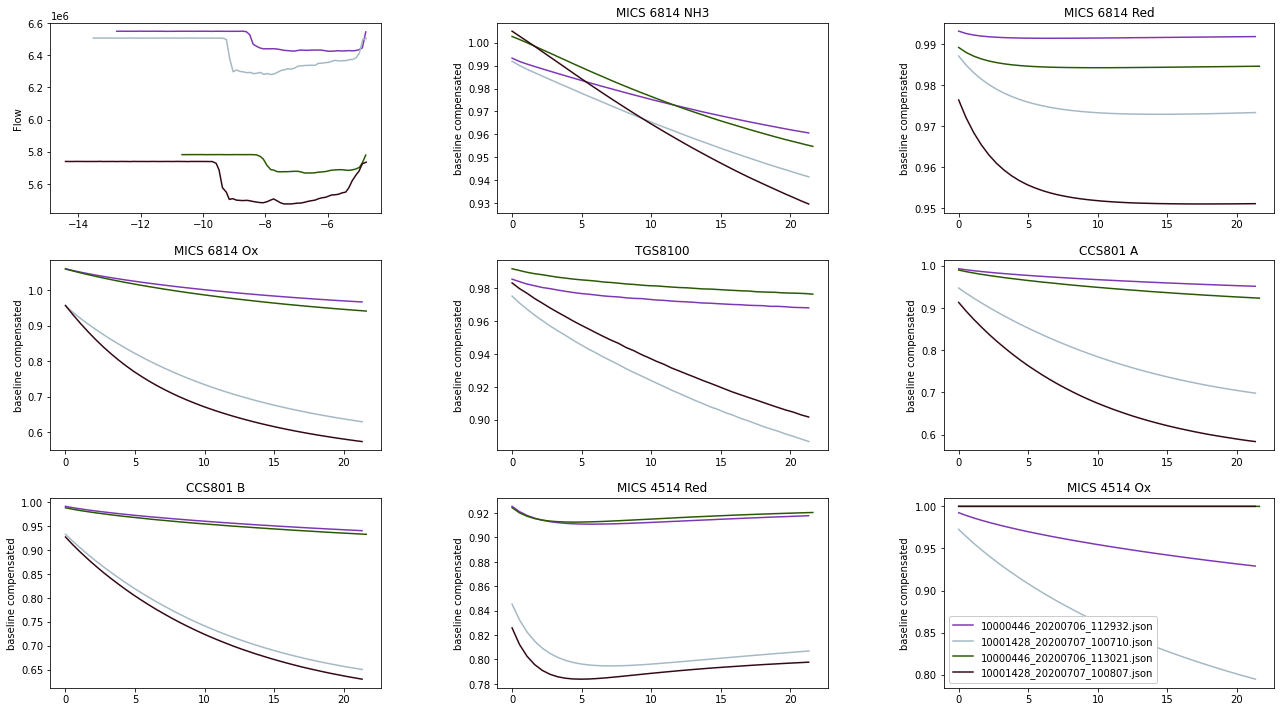

In [3]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(20,11),)

for iidi in link_row:
    this_color = [random.random(), random.random(), random.random()]
    filename = link_table['filename'].iloc[iidi]
    filepath = link_table['folder'].iloc[iidi]

    jsonLabRead = jsonLab_readVolgacore()
    cj = jsonLabRead.read(f'{filepath}/{filename}')
    plot_sensor(cj, filename, fig, this_sensor='GNP', this_color=this_color, legend=True)
plt.show()

fig1, ax1 = plt.subplots(nrows=3, ncols=3,figsize=(20,11),)
for iidi in link_row:
    this_color = [random.random(), random.random(), random.random()]
    filename = link_table['filename'].iloc[iidi]
    filepath = link_table['folder'].iloc[iidi]

    jsonLabRead = jsonLab_readVolgacore()
    cj = jsonLabRead.read(f'{filepath}/{filename}')
    plot_sensor(cj, filename, fig1, this_sensor='MOX analog', this_color=this_color, legend=True)

    
       

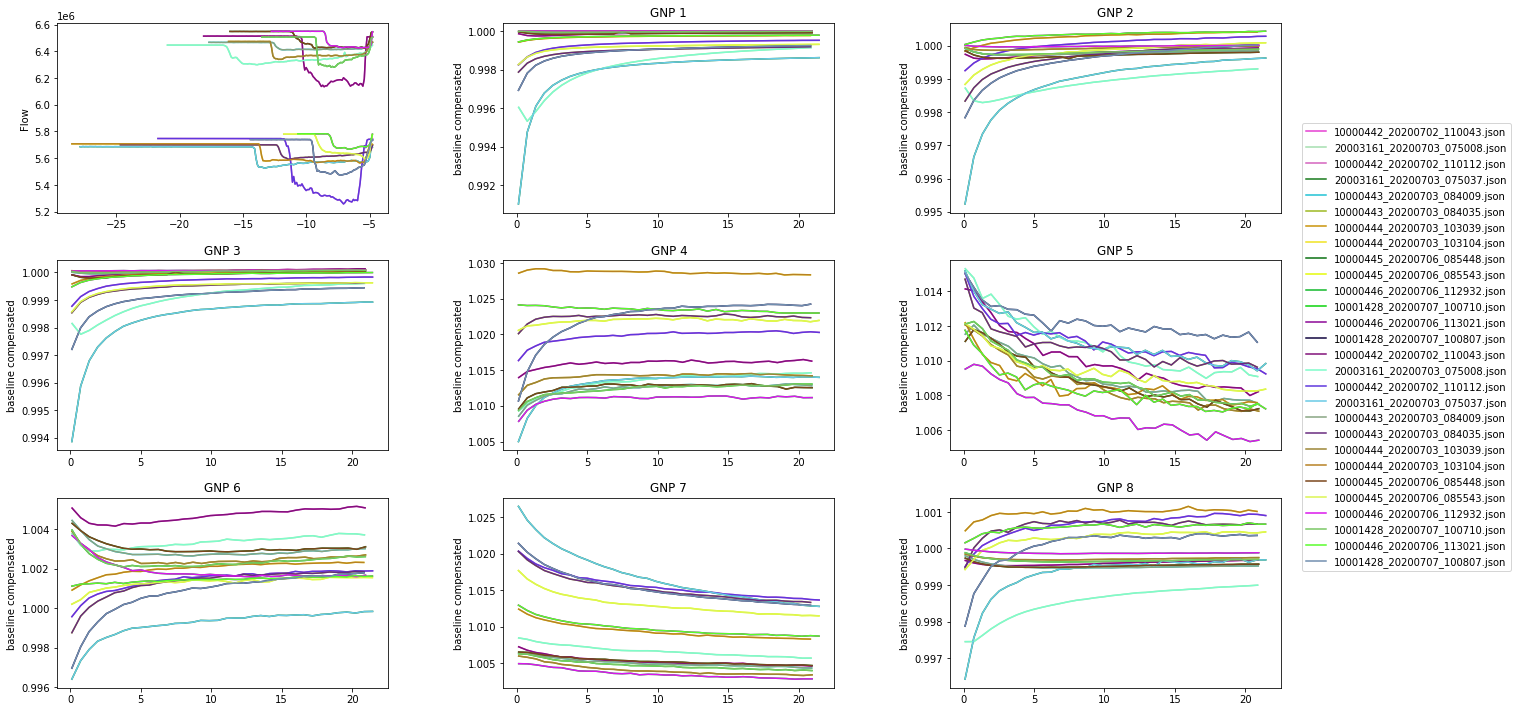

In [4]:
fig2, ax2 = plt.subplots(nrows=3, ncols=3,figsize=(20,11),)
for iigroup in range(1,3):
    currows = np.array(np.where(clin_table.VQ_cancer_group==iigroup))
    #currows[5:] = []; # fasten up the plot by removing most ...
    currows = currows[0][0:5]
    for ii1 in range(len(currows)):
        curid = clin_table['VQ_patientID'][ii1]
        link_row = np.where(link_table.VQ_patientID.values == curid)
        for iidi in range(len(link_row[0])):
            this_color = [random.random(), random.random(), random.random()]
            filepath = link_table.folder[link_row[0][iidi]]
            filename = link_table.filename[link_row[0][iidi]]
            jsonLabRead = jsonLab_readVolgacore()
            cj = jsonLabRead.read(f'{filepath}/{filename}')
            plot_sensor(cj, filename, fig, this_sensor='GNP', this_color=this_color)
